### Requirements

In [1]:
# Não esqueça de fazer a instalação dos Requirements

#pip install requests
#pip install shapely
#pip install leafmap
#pip install ipyleaflet
#pip install opencv-python==3.4.8.29

### Bibliotecas

In [2]:
import csv
import gzip
from io import StringIO
from urllib.request import urlopen
import requests
import leafmap
from ipyleaflet import Map, GeoJSON
from PIL import Image
import cv2
import numpy as np
import zipfile
import time



### Insira as varáveis para busca

In [3]:
# Dicionário de câmeras do CBERS4

cameras = {
'AWFI' : 'https://s3.amazonaws.com/cbers-meta-pds/AWFIscene_list.csv.gz',
'MUX' : 'https://s3.amazonaws.com/cbers-meta-pds/MUXscene_list.csv.gz',
'PAN10M' : ' https://s3.amazonaws.com/cbers-meta-pds/PAN10Mscene_list.csv.gz',
'PAN5M' : ' https://s3.amazonaws.com/cbers-meta-pds/PAN5Mscene_list.csv.gz'}

In [4]:
#AWFI, MUX, PAN1 OU PAN5M
camera = cameras['MUX']

#Intervalo de datas para procurar
data_inicio = '2020-09-01'
data_fim = '2020-09-31'

#latitude e longitude
lat = -23.1791
lon = -45.8872



### Acessando AWS

#### Leitura e unzip dos links

In [5]:
# Leitura e unzip
response = urlopen(camera)
gunzip_response = gzip.GzipFile(fileobj=response)
content = gunzip_response.read()
 
# Lendo o dicionário
scenes = list(csv.DictReader(StringIO(content.decode("utf-8"))))

In [6]:
# Visualizando o formato do aqui

scenes[0]

{'sensor': 'MUX',
 'path': '151',
 'row': '100',
 'acquisition_date': '2014-12-25 13:01:47.747',
 'processing_level': '2',
 'ul_lat': '0.624951',
 'ul_lon': '-38.291584',
 'ur_lat': '0.459649',
 'ur_lon': '-37.218411',
 'lr_lat': '-0.604269',
 'lr_lon': '-37.451715',
 'll_lat': '-0.438915',
 'll_lon': '-38.525082',
 'download_url': 'CBERS4/MUX/151/100/CBERS_4_MUX_20141225_151_100_L2',
 'band_5_gain': '2',
 'band_6_gain': '2',
 'band_7_gain': '2',
 'band_8_gain': '2',
 'sun_elevation': '58.4241',
 'sun_azimuth': '139.558',
 'band_5_download_url': 'CBERS4/MUX/151/100/CBERS_4_MUX_20141225_151_100_L2/CBERS_4_MUX_20141225_151_100_L2_BAND5.tif',
 'band_6_download_url': 'CBERS4/MUX/151/100/CBERS_4_MUX_20141225_151_100_L2/CBERS_4_MUX_20141225_151_100_L2_BAND6.tif',
 'band_7_download_url': 'CBERS4/MUX/151/100/CBERS_4_MUX_20141225_151_100_L2/CBERS_4_MUX_20141225_151_100_L2_BAND7.tif',
 'band_8_download_url': 'CBERS4/MUX/151/100/CBERS_4_MUX_20141225_151_100_L2/CBERS_4_MUX_20141225_151_100_L2_BAND

#### Inserir filtros - Data e Local

##### Função que realiza o filtro

In [7]:
 
def filtro_busca(scene):
    lat_max = float(scene['ul_lat'])
    lat_min = float(scene['lr_lat']) 
    lon_max = float(scene['ur_lon']) 
    lon_min = float(scene['ll_lon'])
    localizacao = lat_min <= lat and lat_max >= lat and \
                       lon_min <= lon and lon_max >= lon
    
    data_filtro = scene['acquisition_date'] >= '{}'.format(data_inicio) and scene['acquisition_date'] <= '{}'.format(data_fim)

    return data_filtro and localizacao
        


##### Realizando busca

In [8]:
busca_satelite = [scene for scene in scenes if filtro_busca(scene)]


##### Resultados

In [9]:
#Quantidade
len(busca_satelite)

1

In [10]:
# Mostra as datas dos resultados

i = 0
resultado = []
if len(busca_satelite) > 1:
    while i < len(busca_satelite):
        busca = [busca_satelite[i]['acquisition_date'][0:10], busca_satelite[i]]
        resultado.append(busca)
        print('Econtramos essa data: ' + busca_satelite[i]['acquisition_date'][0:10])
        i = i + 1
elif len(busca_satelite) == 1:
    busca = [busca_satelite[0]['acquisition_date'][0:10], busca_satelite[0]]
    resultado.append(busca)
    print('Econtramos essa data: ' + busca_satelite[0]['acquisition_date'][0:10])
else:
    print('Não houve nenhum resultado, tente outros parâmetros!')
    time.sleep(10)
    quit()

Econtramos essa data: 2020-09-24


In [11]:
# Os resultados foram inseridos em uma lista e transformados em um dicionário 
resultado = dict(resultado)


In [12]:
#Escolhe um dos resultados
data = '2020-09-24'
pesquisa = resultado[data]

In [13]:
# Visualizando o resultado
pesquisa

{'sensor': 'MUX',
 'path': '154',
 'row': '126',
 'acquisition_date': '2020-09-24 13:11:42.526',
 'processing_level': '4',
 'ul_lat': '-22.636242',
 'ul_lon': '-46.547262',
 'ur_lat': '-22.816673',
 'ur_lon': '-45.378133',
 'lr_lat': '-23.876055',
 'lr_lon': '-45.636284',
 'll_lat': '-23.694134',
 'll_lon': '-46.815011',
 'download_url': 'CBERS4/MUX/154/126/CBERS_4_MUX_20200924_154_126_L4',
 'band_5_gain': '2',
 'band_6_gain': '2',
 'band_7_gain': '2',
 'band_8_gain': '2',
 'sun_elevation': '56.4716',
 'sun_azimuth': '51.2007',
 'band_5_download_url': 'CBERS4/MUX/154/126/CBERS_4_MUX_20200924_154_126_L4/CBERS_4_MUX_20200924_154_126_L4_BAND5.tif',
 'band_6_download_url': 'CBERS4/MUX/154/126/CBERS_4_MUX_20200924_154_126_L4/CBERS_4_MUX_20200924_154_126_L4_BAND6.tif',
 'band_7_download_url': 'CBERS4/MUX/154/126/CBERS_4_MUX_20200924_154_126_L4/CBERS_4_MUX_20200924_154_126_L4_BAND7.tif',
 'band_8_download_url': 'CBERS4/MUX/154/126/CBERS_4_MUX_20200924_154_126_L4/CBERS_4_MUX_20200924_154_126_L

### Acessando o STAC

In [14]:
# Forma a URL de acesso ao STAC de acordo com o resultado dos filtros aplicados

url_json = "https://cbers-stac-1-0.s3.amazonaws.com/" + pesquisa['download_url']+".json"

In [15]:
url_json

'https://cbers-stac-1-0.s3.amazonaws.com/CBERS4/MUX/154/126/CBERS_4_MUX_20200924_154_126_L4.json'

In [16]:
#Acessa o STAC

link_json = requests.get(url_json)

# Faz a leitura do arquivo json

arquivo_json = link_json.json()

### Acessando, Visualizando e Baixando as Imagens

#### Imagens JPG

In [17]:
#Função para visualizar a imagem em formato JPG

def visualizar_jpg(url):
    img_jpg = Image.open(requests.get(url, stream=True).raw)
    return img_jpg

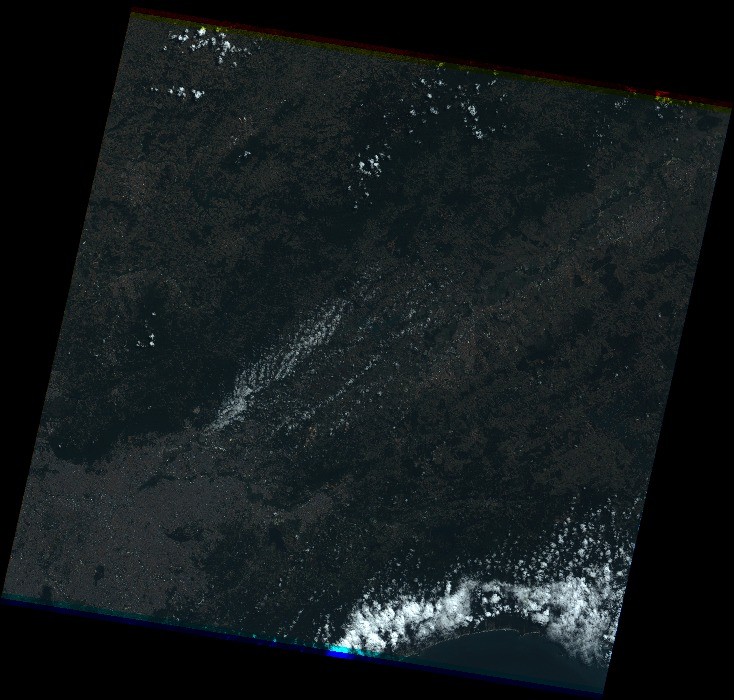

In [18]:
#Ação para visualizar a imagem

img_jpg_url = arquivo_json['assets']['thumbnail']['href']
visualizar_jpg(img_jpg_url)

#### Imagem TIFF

In [19]:
#Filtro para acessar a imagem dentro do arquivo JSON

img_jpg_url = arquivo_json['assets']['thumbnail']['href']
img_jpg_url

'https://s3.amazonaws.com/cbers-meta-pds/CBERS4/MUX/154/126/CBERS_4_MUX_20200924_154_126_L4/CBERS_4_MUX_20200924_154_126.jpg'

In [20]:
#Função para baixar imagem TIFF

def baixar_img_tiff(url):
  with open("imagem-satelite.tiff", 'wb') as imagem:
    resposta = requests.get(url, stream=True)

    if not resposta.ok:
      print("Ocorreu um erro, status:" , resposta.status_code)
    else:
      for dado in resposta.iter_content(1024):
        if not dado:
            break

        imagem.write(dado)

  return print("Imagem salva! É só acessar sua pasta agora =)")

In [21]:
# Ação para baixar a imagem TIFF

baixar_img_tiff(img_jpg_url)

Imagem salva! É só acessar sua pasta agora =)


In [22]:
#Função para baixar as bandas separadas e salvar em um zip

def baixar_bandas():
    
    # Separando a imagem em 3 bandas e salvando
    img = cv2.imread("imagem-satelite.tiff")
    (canalAzul, canalVerde, canalVermelho) = cv2.split(img)
    zeros = np.zeros(img.shape[:2], dtype = "uint8")


    # Código abaixo abre as imagens
    #cv2.imshow("Banda_4_vermelho", cv2.merge([zeros, zeros, canalVermelho]))
    #cv2.imshow("Banda_3_verde", cv2.merge([zeros, canalVerde, zeros]))
    #cv2.imshow("Banda_2_azul", cv2.merge([canalAzul, zeros, zeros]))
    #cv2.waitKey(0)


    # Salvando imagems fragmentadas em bandas RGB
    cv2.imwrite("Banda_4_vermelho.tiff", cv2.merge([zeros, zeros, canalVermelho]))
    cv2.imwrite("Banda_3_verde.tiff", cv2.merge([zeros, canalVerde, zeros]))
    cv2.imwrite("Banda_2_azul.tiff", cv2.merge([canalAzul, zeros, zeros]))

    
    # Abrindo uma pasta .zip, armazenando e fechando
    z = zipfile.ZipFile('satelite.zip', 'w', zipfile.ZIP_DEFLATED)
    z.write("Banda_4_vermelho.tiff")
    z.write("Banda_3_verde.tiff")
    z.write("Banda_2_azul.tiff")
    z.close()
    return print("Salvo!! É só acessar sua pasta agora =)")

In [23]:
#Ação para baixar as bandas

baixar_bandas()

Salvo!! É só acessar sua pasta agora =)


In [24]:
def contraste_brilho():
    img = cv2.imread("imagem-satelite.tiff")

    alpha = 2 # Controle de Contraste (pode variar de 1.0 a 3.0)
    beta = 0 # Controle de brilho (pode variar de 0 a 100)

    adjuste = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    cv2.imwrite("novasatelite.tiff", adjuste)
    return print("Salvo!! É só acessar sua pasta agora =)")

In [25]:
#Ação para aplicar efeitos e baixar a imagem

contraste_brilho()

Salvo!! É só acessar sua pasta agora =)


#### LeafMap Dinâmico com as Imagens

##### Marcar local de abrangência

In [26]:
#Função para gerar mapa com marcador 


def marcador_leafmap(data):
    m = leafmap.Map(center=(lat, lon),zoom=7)
    geo_json = GeoJSON(
        data=data)
    m.add_layer(geo_json)
    return m



In [27]:
# Visualizar mapa

marcador_leafmap(arquivo_json)


Map(center=[-23.1791, -45.8872], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…